In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import math

In [12]:
#Initializing the pixels, no.of images per person and no. of people

npixels = 4096
nimages = 10 
nsubjects = 15

In [13]:
mainpath = "Dataset" # directory path

In [14]:
# Initializations
data = np.zeros(shape=(nsubjects, npixels,nimages), dtype='int') #to store the images

data_shifted = np.zeros(shape=(nsubjects, npixels, nimages)) # to store mean shifted data matrix

data_rep = np.zeros(shape=(npixels, nsubjects)) # create representative image data matrix

In [15]:
# Collapsing each image to a columns vector and forming the Combined matrix

for i in range(nsubjects):
    
    
    for j in range(nimages):
        
        m = str(i+1)
        n = str(j+1)
        
        path = mainpath + '/' + m + '/' + n + '.pgm'
        
        img = plt.imread(path)
        
        data[i, :, j] = np.matrix.flatten(img, 'F') # converting to column vector
        
        
    data_shifted[i,:,:] = data[i,:,:] - np.mean(data[i,:,:],0) # mean shifting
    
    u, s_, v = la.svd(data_shifted[i,:,:]) # applying svd
    
    s = la.diagsvd(s_,*data_shifted[i,:,:].shape)
    
    temp = u[:,0].reshape(npixels,1)@s[0,:].reshape(1,nimages)@v[:,0].reshape(nimages,1) # compressing images
    data_rep[:,i] = temp.reshape(npixels)

In [16]:
# Percentage Variance retained

var_ret = (s_[0] ** 2) / (sum(np.square(s_))) * 100

print('Percentage variance retained is %2.2f %%' %(var_ret))

Percentage variance retained is 64.22 %


In [17]:
# Determining number of correctly indentified images

correct = 0
print("These images do not match (sub, image):")

for i in range(nsubjects):
    
    for j in range(nimages):
        error = math.inf
        ind = -1
        
        for k in range(nsubjects):
            l2_norm = la.norm(data_shifted[i,:,j] - data_rep[:,k]) # calculating norm
            
            if l2_norm < error:
                error = l2_norm
                index = k
        
        if index == i:
            correct += 1
        else:
            print('person', i+1, 'img no.', j+1)
            
            
print("\nNumber of images correctly identified:", correct)

These images do not match (sub, image):
person 1 img no. 2
person 7 img no. 2
person 7 img no. 7
person 7 img no. 10
person 9 img no. 9

Number of images correctly identified: 145


In [18]:
# Accuracy

accuracy = correct / 150 * 100
print('\nThe accuracy obtained is %2.2f %%' %(accuracy))


The accuracy obtained is 96.67 %


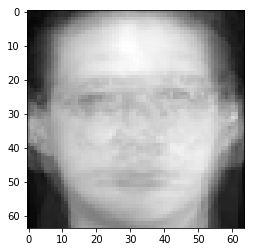

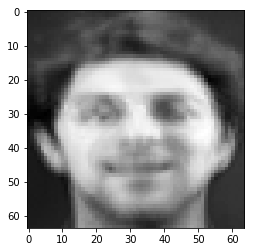

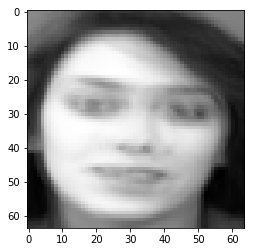

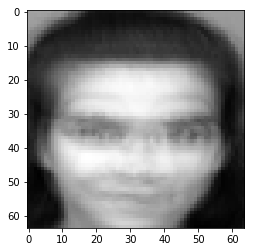

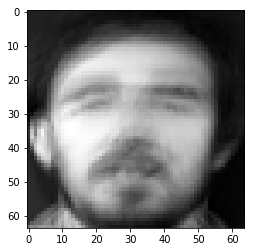

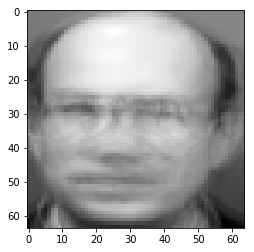

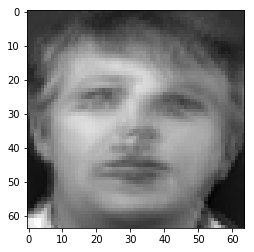

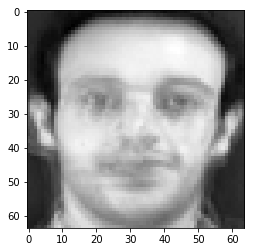

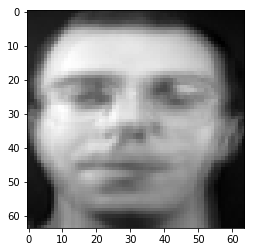

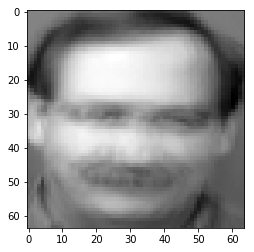

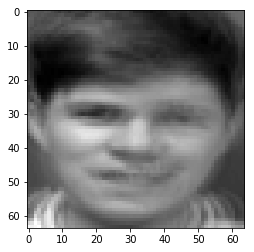

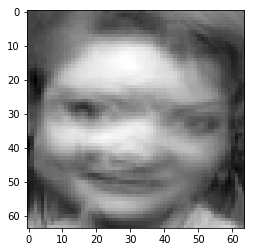

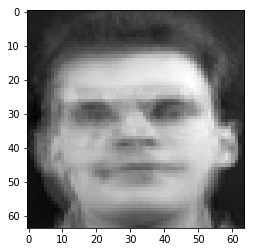

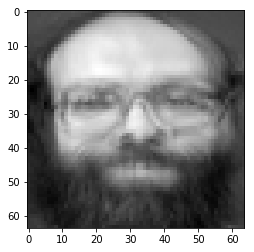

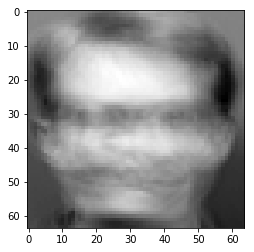

In [19]:
# Printing representative images

for i in range(nsubjects):
    img = data_rep[:,i] + np.mean(data[i,:,:])
    img = img.reshape((64,64)).T
    a = str(i+1)
    name = a + '.png'
    plt.figure()
#     plt.imsave(name, img, cmap='gray')
    plt.imshow(img, cmap='gray')